In [150]:
import pandas as pd
import math
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [151]:
dfData = pd.read_csv("/home/archit/Desktop/ad vs organic/cleaned_subset.csv", encoding = 'unicode_escape')
dfData.head()

,Id,Title,Description,LikeCount,DislikeCount,ViewCount,FavoriteCount,CommentCount,PublishedAt,Channel Id,Channel Title,Tags,Thumbnail Default
0,AUzyaHo0QQc,b'300 pushups a day for 20 days!! - Results!!',b'**NEW** (2016) Abs Workout for 30 Days | htt...,40408,10312,13577683,0,8236,2010-07-22T10:28:30.000Z,UCPE_dNzOtjpP0vUA6papYaw,TheUncutAngel,"['theuncutangel', 'the', 'uncut', 'angel', 'sc...",b'https://i.ytimg.com/vi/AUzyaHo0QQc/default.jpg'
1,1Zgtdb7jp60,b'John Cena - gym',"b""Follow John Cena on twitter: http://www.twit...",37867,1486,9986096,0,2563,2012-02-20T13:55:03.000Z,UCpAxDQTpPNgc6kFiBRNO_1A,JohnCenafan0423,"['John Cena', 'john', 'cena', 'catch', 'raw', ...",b'https://i.ytimg.com/vi/1Zgtdb7jp60/default.jpg'
2,1Sfii7rnkJQ,b'Bodybuilding Motivation - No Time To Waste',"b""Follow me:\nhttp://instagram.com/shaqx.bb\nh...",17688,1291,8532402,0,1515,2012-01-18T15:06:01.000Z,UC3uDucFPe-E0I6CfxtHWZ6w,ShaQxTV,"['ShaQx', 'Bodybuilding', 'Motivation', 'Chall...",b'https://i.ytimg.com/vi/1Sfii7rnkJQ/default.jpg'
3,UUwSKJjx9Go,b'Most Powerful Home Chest Workout Ever : Buil...,b'http://www.6weeksixpack.com This is one of t...,46293,2589,8301027,0,1490,2013-10-17T21:56:53.000Z,UCsiNPbLbwZk43FOCRrdKBlA,Sixpackfactory.com,"['chest workout', 'best chest workout', 'home ...",b'https://i.ytimg.com/vi/UUwSKJjx9Go/default.jpg'
4,Yl3NGvna2KA,b'Greg Plitt Best of The Best Workout Video Pr...,b'SIGN UP TODAY - http://bit.ly/jointheranks\r...,24784,1134,7141821,0,575,2011-03-30T18:57:57.000Z,UCU6WaCIOCL_eToBcsBYFwAQ,Greg Plitt,"['greg plitt', 'workout', 'get huge', 'muscle'...",b'https://i.ytimg.com/vi/Yl3NGvna2KA/default.jpg'


In [152]:
dfPrev = pd.read_csv("/home/archit/Desktop/ad vs organic/prev_vid_stat.csv")
dfPrev.columns = ['Id','PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount',
       'PrevPublishedAt', 'PrevViewCount', 'PrevTitle', 'PublishedYear',
       'ChannelAge']
dfPrev.to_csv("/home/archit/Desktop/ad vs organic/prev_vid_stat.csv", index=False)
dfPrev.head()

,Id,PrevCommentCount,PrevDislikeCount,PrevLikeCount,PrevPublishedAt,PrevViewCount,PrevTitle,PublishedYear,ChannelAge
0,1Sfii7rnkJQ,3411.0,1873.0,33472.0,2011-12-27T12:38:06.000Z,11719659.0,Bodybuilding Motivation - Pain is Temporary,2012,2011
1,EBVTMSKY-Cw,159.0,106.0,1964.0,2012-01-25T13:53:09.000Z,628378.0,BODYBUILDING MOTIVATION - The Power Of Faith,2012,2010
2,VnNH6OMqT9E,0.0,0.0,0.0,0,0.0,0,2012,2009
3,isb4txkVPrk,43.0,3.0,224.0,2011-09-26T00:33:38.000Z,58192.0,Bodybuilding Motivation - I Choose To Rise (MPW),2011,2011
4,o-IVVhPrZ0A,1037.0,195.0,8181.0,2012-04-30T10:02:07.000Z,1710615.0,I can't stop BODYBUILDING,2012,2010


In [153]:
dfLang = pd.read_csv("/home/archit/Desktop/ad vs organic/data_and_language.csv", encoding = 'unicode_escape')
dfLang.head()

,Id,Lang
0,AUzyaHo0QQc,en
1,1Zgtdb7jp60,en
2,1Sfii7rnkJQ,en
3,UUwSKJjx9Go,en
4,Yl3NGvna2KA,en


In [154]:
# clickbait.csv have two versions in it .
# difference among the two is indexing. Lines from 10684 have inbuilt indexing.
# following code was made not considering this
# Code uses usecols and concat functioj of pandas libraray

In [155]:
#reader = pd.read_csv("/home/archit/Desktop/ad vs organic/clickbait.csv", encoding = 'unicode_escape', usecols = [0, 1], chunksize = 10683)
#df5 = pd.concat([chunk.iloc[:10684] for chunk in reader])
#df5.head(-1)

In [156]:
dfClickBait = pd.read_csv("/home/archit/Desktop/ad vs organic/clickbait.csv", encoding = 'unicode_escape', nrows = 10683)
dfClickBait.head()

,Id,Title-Clickbait
0,AUzyaHo0QQc,0.923196
1,1Zgtdb7jp60,0.106193
2,1Sfii7rnkJQ,0.155738
3,UUwSKJjx9Go,0.075479
4,Yl3NGvna2KA,0.351647


In [157]:
dfChannel = pd.read_csv("/home/archit/Desktop/ad vs organic/channelStats.csv", encoding = 'unicode_escape')
dfChannel.head()

,Channel Id,publishedAt,subscriberCount,channelVideoCount,channelViewCount
0,UCUlTFib0pkPDGBYh7FQfo0A,2011-03-21T19:58:31.000Z,13,16,5803
1,UCvqHrRPqBw0D9B0wCNVwu8w,2012-01-07T22:35:00.000Z,3682,308,484444
2,UCatjfgWbdCUxNNAso8z9Usg,2006-10-06T22:31:17.000Z,96,50,143635
3,UCQa2_4V_9xtLefQGiPXqgNw,2006-10-12T09:10:36.000Z,29,4,11927
4,UCvzrgT1n8Im2bPogecOOu7A,2006-11-14T23:23:59.000Z,25,118,17209


In [158]:
dfData = dfData.merge(dfLang, on = 'Id', how = 'left')
dfData = dfData.merge(dfPrev, on = 'Id', how = 'left')
dfData = dfData.merge(dfClickBait, on = 'Id', how = 'left')
dfData = dfData.merge(dfChannel, on = 'Channel Id', how = 'left')
dfData.head()

,Id,Title,Description,LikeCount,DislikeCount,ViewCount,FavoriteCount,CommentCount,PublishedAt,Channel Id,...,PrevPublishedAt,PrevViewCount,PrevTitle,PublishedYear,ChannelAge,Title-Clickbait,publishedAt,subscriberCount,channelVideoCount,channelViewCount
0,AUzyaHo0QQc,b'300 pushups a day for 20 days!! - Results!!',b'**NEW** (2016) Abs Workout for 30 Days | htt...,40408,10312,13577683,0,8236,2010-07-22T10:28:30.000Z,UCPE_dNzOtjpP0vUA6papYaw,...,NaN,NaN,NaN,NaN,NaN,0.923196,2009-12-22T03:47:24.000Z,47571,23,16245729
1,1Zgtdb7jp60,b'John Cena - gym',"b""Follow John Cena on twitter: http://www.twit...",37867,1486,9986096,0,2563,2012-02-20T13:55:03.000Z,UCpAxDQTpPNgc6kFiBRNO_1A,...,NaN,NaN,NaN,NaN,NaN,0.106193,2011-11-11T20:58:03.000Z,109298,6,47779958
2,1Sfii7rnkJQ,b'Bodybuilding Motivation - No Time To Waste',"b""Follow me:\nhttp://instagram.com/shaqx.bb\nh...",17688,1291,8532402,0,1515,2012-01-18T15:06:01.000Z,UC3uDucFPe-E0I6CfxtHWZ6w,...,2011-12-27T12:38:06.000Z,11719659.0,Bodybuilding Motivation - Pain is Temporary,2012.0,2011.0,0.155738,2011-07-09T16:13:17.000Z,218558,19,75698414
3,UUwSKJjx9Go,b'Most Powerful Home Chest Workout Ever : Buil...,b'http://www.6weeksixpack.com This is one of t...,46293,2589,8301027,0,1490,2013-10-17T21:56:53.000Z,UCsiNPbLbwZk43FOCRrdKBlA,...,NaN,NaN,NaN,NaN,NaN,0.075479,2006-08-07T08:12:53.000Z,1145468,585,186804665
4,Yl3NGvna2KA,b'Greg Plitt Best of The Best Workout Video Pr...,b'SIGN UP TODAY - http://bit.ly/jointheranks\r...,24784,1134,7141821,0,575,2011-03-30T18:57:57.000Z,UCU6WaCIOCL_eToBcsBYFwAQ,...,NaN,NaN,NaN,NaN,NaN,0.351647,2009-10-24T03:18:10.000Z,158091,22,9908854


In [159]:
dfData.columns

Index(['Id', 'Title', 'Description', 'LikeCount', 'DislikeCount', 'ViewCount',
       'FavoriteCount', 'CommentCount', 'PublishedAt', 'Channel Id',
       'Channel Title', 'Tags', 'Thumbnail Default', 'Lang',
       'PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount',
       'PrevPublishedAt', 'PrevViewCount', 'PrevTitle', 'PublishedYear',
       'ChannelAge', 'Title-Clickbait', 'publishedAt', 'subscriberCount',
       'channelVideoCount', 'channelViewCount'],
      dtype='object')

In [160]:
dfData = dfData[dfData['channelVideoCount'] < 2000]
dfData = dfData[dfData['subscriberCount'] > 0]
dfData = dfData[dfData['Lang'] == 'en']

In [161]:
dfData.head()

,Id,Title,Description,LikeCount,DislikeCount,ViewCount,FavoriteCount,CommentCount,PublishedAt,Channel Id,...,PrevPublishedAt,PrevViewCount,PrevTitle,PublishedYear,ChannelAge,Title-Clickbait,publishedAt,subscriberCount,channelVideoCount,channelViewCount
0,AUzyaHo0QQc,b'300 pushups a day for 20 days!! - Results!!',b'**NEW** (2016) Abs Workout for 30 Days | htt...,40408,10312,13577683,0,8236,2010-07-22T10:28:30.000Z,UCPE_dNzOtjpP0vUA6papYaw,...,NaN,NaN,NaN,NaN,NaN,0.923196,2009-12-22T03:47:24.000Z,47571,23,16245729
1,1Zgtdb7jp60,b'John Cena - gym',"b""Follow John Cena on twitter: http://www.twit...",37867,1486,9986096,0,2563,2012-02-20T13:55:03.000Z,UCpAxDQTpPNgc6kFiBRNO_1A,...,NaN,NaN,NaN,NaN,NaN,0.106193,2011-11-11T20:58:03.000Z,109298,6,47779958
2,1Sfii7rnkJQ,b'Bodybuilding Motivation - No Time To Waste',"b""Follow me:\nhttp://instagram.com/shaqx.bb\nh...",17688,1291,8532402,0,1515,2012-01-18T15:06:01.000Z,UC3uDucFPe-E0I6CfxtHWZ6w,...,2011-12-27T12:38:06.000Z,11719659.0,Bodybuilding Motivation - Pain is Temporary,2012.0,2011.0,0.155738,2011-07-09T16:13:17.000Z,218558,19,75698414
3,UUwSKJjx9Go,b'Most Powerful Home Chest Workout Ever : Buil...,b'http://www.6weeksixpack.com This is one of t...,46293,2589,8301027,0,1490,2013-10-17T21:56:53.000Z,UCsiNPbLbwZk43FOCRrdKBlA,...,NaN,NaN,NaN,NaN,NaN,0.075479,2006-08-07T08:12:53.000Z,1145468,585,186804665
4,Yl3NGvna2KA,b'Greg Plitt Best of The Best Workout Video Pr...,b'SIGN UP TODAY - http://bit.ly/jointheranks\r...,24784,1134,7141821,0,575,2011-03-30T18:57:57.000Z,UCU6WaCIOCL_eToBcsBYFwAQ,...,NaN,NaN,NaN,NaN,NaN,0.351647,2009-10-24T03:18:10.000Z,158091,22,9908854


In [162]:
dfData.shape

(6337, 27)

In [163]:
type(dfData['Title'])

pandas.core.series.Series

In [164]:
# Conver to lower case 
dfData['Title'] = dfData['Title'].str.lower()


# How To
dfData['HowTo'] = (dfData['Title'].str.contains('how')  | 
                       dfData['Tags'].str.contains('how'))

# Motivational
dfData['Motivation'] = (dfData['Title'].str.contains('motivation')  | 
                       dfData['Tags'].str.contains('motivation')  
                      )


# Transformation
dfData['Transform'] = (dfData['Title'].str.contains('transform')  | 
                       dfData['Tags'].str.contains('transform')  
                      )

# Abs Workout
dfData['Abs Video'] = (dfData['Title'].str.contains('abs')  | 
                       dfData['Title'].str.contains('six') | 
                       dfData['Title'].str.contains(' 6') | 
                       dfData['Title'].str.contains('abdomen') |
                       dfData['Tags'].str.contains('abs')  | 
                       dfData['Tags'].str.contains('six') | 
                       dfData['Tags'].str.contains(' 6') | 
                       dfData['Tags'].str.contains('abdomen') 
                      )
        
# Chest Workout
dfData['Chest Video'] = (dfData['Title'].str.contains('chest')  |
                         dfData['Title'].str.contains('pushup') | 
                         dfData['Title'].str.contains('bench') | 
                         dfData['Title'].str.contains('bench') | 
                         dfData['Title'].str.contains('push up') |
                         dfData['Title'].str.contains('dumbell press') |
                         dfData['Tags'].str.contains('chest')  |
                         dfData['Tags'].str.contains('pushup') | 
                         dfData['Tags'].str.contains('bench') | 
                         dfData['Tags'].str.contains('bench') | 
                         dfData['Tags'].str.contains('push up') |
                         dfData['Tags'].str.contains('dumbell press'))

# Back Workouts 
dfData['Back Video'] = (dfData['Title'].str.contains('back') | 
                        dfData['Title'].str.contains('pull up') | 
                        dfData['Title'].str.contains('chin up')  | 
                        dfData['Title'].str.contains('deadlift') | 
                        dfData['Tags'].str.contains('back') | 
                        dfData['Tags'].str.contains('pull up') | 
                        dfData['Tags'].str.contains('chin up')  | 
                        dfData['Tags'].str.contains('deadlift'))

# Leg Workouts
dfData['Legs Video'] = (dfData['Title'].str.contains('leg') | 
                        dfData['Title'].str.contains('squat') | 
                        dfData['Title'].str.contains('butt') | 
                        dfData['Title'].str.contains('quad') | 
                        dfData['Title'].str.contains('calve') |
                       dfData['Tags'].str.contains('leg') | 
                        dfData['Tags'].str.contains('squat') | 
                        dfData['Tags'].str.contains('butt') | 
                        dfData['Tags'].str.contains('quad') | 
                        dfData['Tags'].str.contains('calve') )

# Arm Workout
dfData['Arm Video'] = (dfData['Title'].str.contains('shoulder') | 
                       dfData['Title'].str.contains('arm') | 
                       dfData['Title'].str.contains('bicep')  |
                       dfData['Title'].str.contains('tricep') | 
                       dfData['Title'].str.contains('delt') |
                       dfData['Tags'].str.contains('shoulder') | 
                       dfData['Tags'].str.contains('arm') | 
                       dfData['Tags'].str.contains('bicep')  |
                       dfData['Tags'].str.contains('tricep') | 
                       dfData['Tags'].str.contains('delt'))

In [165]:
dfData.head()

,Id,Title,Description,LikeCount,DislikeCount,ViewCount,FavoriteCount,CommentCount,PublishedAt,Channel Id,...,channelVideoCount,channelViewCount,HowTo,Motivation,Transform,Abs Video,Chest Video,Back Video,Legs Video,Arm Video
0,AUzyaHo0QQc,b'300 pushups a day for 20 days!! - results!!',b'**NEW** (2016) Abs Workout for 30 Days | htt...,40408,10312,13577683,0,8236,2010-07-22T10:28:30.000Z,UCPE_dNzOtjpP0vUA6papYaw,...,23,16245729,False,False,False,True,True,False,False,False
1,1Zgtdb7jp60,b'john cena - gym',"b""Follow John Cena on twitter: http://www.twit...",37867,1486,9986096,0,2563,2012-02-20T13:55:03.000Z,UCpAxDQTpPNgc6kFiBRNO_1A,...,6,47779958,False,True,False,False,True,True,True,True
2,1Sfii7rnkJQ,b'bodybuilding motivation - no time to waste',"b""Follow me:\nhttp://instagram.com/shaqx.bb\nh...",17688,1291,8532402,0,1515,2012-01-18T15:06:01.000Z,UC3uDucFPe-E0I6CfxtHWZ6w,...,19,75698414,False,True,False,False,False,False,False,False
3,UUwSKJjx9Go,b'most powerful home chest workout ever : buil...,b'http://www.6weeksixpack.com This is one of t...,46293,2589,8301027,0,1490,2013-10-17T21:56:53.000Z,UCsiNPbLbwZk43FOCRrdKBlA,...,585,186804665,False,False,False,True,True,False,False,False
4,Yl3NGvna2KA,b'greg plitt best of the best workout video pr...,b'SIGN UP TODAY - http://bit.ly/jointheranks\r...,24784,1134,7141821,0,575,2011-03-30T18:57:57.000Z,UCU6WaCIOCL_eToBcsBYFwAQ,...,22,9908854,False,False,False,False,True,True,False,True


In [166]:
# order of preference in categorizing video in case there are multiple categories to fit
# abs < chest < back < legs < arm < motivaton < HowTo < Motivation < Transform
dfData.loc[dfData['Abs Video'] == True , 'Category'] = 'Abs'
dfData.loc[dfData['Chest Video'] == True , 'Category'] = 'Chest'
dfData.loc[dfData['Back Video'] == True, 'Category'] = 'Back'
dfData.loc[dfData['Legs Video'] == True, 'Category'] = 'Legs'
dfData.loc[dfData['Arm Video'] == True, 'Category'] = 'Arms'
#dfData.loc[dfData['Motivation'] == True, 'Category'] = 'Motivation'
dfData.loc[dfData['HowTo'] == True, 'Category'] = 'HowTo'
dfData.loc[dfData['Motivation'] == True, 'Category'] = 'Motivation'
dfData.loc[dfData['Transform'] == True, 'Category'] = 'Transform'
dfData.shape

(6337, 36)

In [167]:
otherVid = dfData[dfData['Category'].isnull()]
otherVid.shape[0]

2971

In [168]:
dfData = dfData[dfData['Category'].notnull()]
dfData.shape

(3366, 36)

In [169]:
absVid = dfData[dfData['Category'] == 'Abs']
chestVid = dfData[dfData['Category'] == 'Chest']
backVid = dfData[dfData['Category'] == 'Back']
legsVid = dfData[dfData['Category'] == 'Legs']
armsVid = dfData[dfData['Category'] == 'Arms']
howToVid = dfData[dfData['Category'] == 'HowTo']
motivationVid = dfData[dfData['Category'] == 'Motivation']
transformVid = dfData[dfData['Category'] == 'Transform']


print("Number of Abs Related Videos: " + str(absVid.shape[0]))
print("Number of Chest Related Videos: " + str(chestVid.shape[0]))
print("Number of Back Related Videos: " + str(backVid.shape[0]))
print("Number of Leg Related Videos: " + str(legsVid.shape[0]))
print("Number of Arm Related Videos: " + str(armsVid.shape[0]))

Number of Abs Related Videos: 244
Number of Chest Related Videos: 234
Number of Back Related Videos: 314
Number of Leg Related Videos: 631
Number of Arm Related Videos: 621


### Different categories of fitnesss videos in database

Text(0.5,1,'Number of Videos for each Muscle Group')

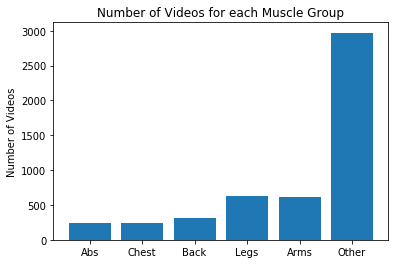

In [170]:
yCols = ['Abs', 'Chest', 'Back', 'Legs', 'Arms', 'Other']
xCols = [absVid.shape[0], chestVid.shape[0], backVid.shape[0], legsVid.shape[0], armsVid.shape[0], otherVid.shape[0]]
y = np.arange(len(yCols))
plt.bar(y, xCols,align = 'center')
plt.xticks(y,yCols)
plt.ylabel("Number of Videos")
plt.title("Number of Videos for each Muscle Group")

### Understanding view distribution

Category
Motivation    160787.713904
Chest         144898.914530
Transform     118548.230303
HowTo          86320.269476
Abs            83654.860656
Arms           57989.167472
Back           52984.429936
Legs           36815.242472
Name: ViewCount, dtype: float64


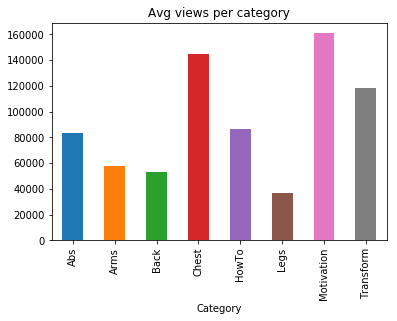

In [171]:
dfData.groupby('Category').ViewCount.mean().plot(kind = 'bar', title = 'Avg views per category')
print(dfData.groupby('Category').ViewCount.mean().sort_values(ascending = False))

In [172]:
dfData.columns

Index(['Id', 'Title', 'Description', 'LikeCount', 'DislikeCount', 'ViewCount',
       'FavoriteCount', 'CommentCount', 'PublishedAt', 'Channel Id',
       'Channel Title', 'Tags', 'Thumbnail Default', 'Lang',
       'PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount',
       'PrevPublishedAt', 'PrevViewCount', 'PrevTitle', 'PublishedYear',
       'ChannelAge', 'Title-Clickbait', 'publishedAt', 'subscriberCount',
       'channelVideoCount', 'channelViewCount', 'HowTo', 'Motivation',
       'Transform', 'Abs Video', 'Chest Video', 'Back Video', 'Legs Video',
       'Arm Video', 'Category'],
      dtype='object')

Category
Motivation    160787.713904
Chest         144898.914530
Transform     118548.230303
HowTo          86320.269476
Abs            83654.860656
Arms           57989.167472
Back           52984.429936
Legs           36815.242472
Name: ViewCount, dtype: float64


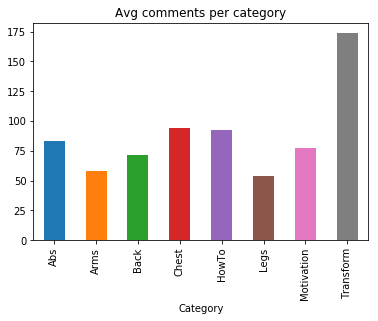

In [173]:
dfData.groupby('Category').CommentCount.mean().plot(kind = 'bar', title = 'Avg comments per category')
print(dfData.groupby('Category').ViewCount.mean().sort_values(ascending = False))

Category
Transform     869.060606
Motivation    719.604278
HowTo         698.176245
Chest         592.914530
Abs           577.483607
Arms          449.909823
Legs          365.470681
Back          308.082803
Name: LikeCount, dtype: float64


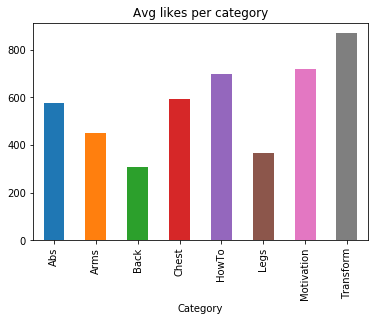

In [174]:
dfData.groupby('Category').LikeCount.mean().plot(kind = 'bar', title = 'Avg likes per category')
print(dfData.groupby('Category').LikeCount.mean().sort_values(ascending = False))

Category
Chest         101.927350
Transform      53.569697
Motivation     34.350267
Abs            30.094262
HowTo          25.298851
Back           18.640127
Arms           17.826087
Legs           14.773376
Name: DislikeCount, dtype: float64


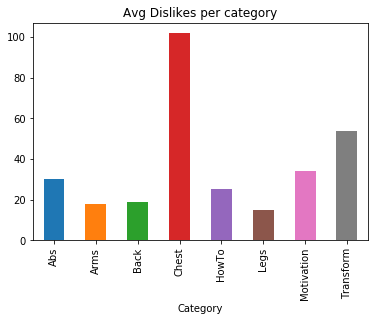

In [175]:
dfData.groupby('Category').DislikeCount.mean().plot(kind = 'bar', title = 'Avg Dislikes per category')
print(dfData.groupby('Category').DislikeCount.mean().sort_values(ascending = False))

### Obseravtions
Give proper insight here later using venn diagram

### Sponsorship/ discounted videos view distribution

isSponsored
False     79952.533855
True     274383.674419
Name: ViewCount, dtype: float64


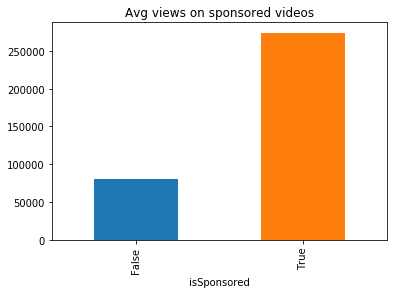

In [176]:
dfData['isSponsored'] = dfData['Description'].str.contains("sponsored") | dfData['Description'].str.contains("provided by")
dfData.groupby('isSponsored').ViewCount.mean().plot(kind = 'bar', title = 'Avg views on sponsored videos')
print(dfData.groupby('isSponsored').ViewCount.mean())

hasDiscount
False    82497.765649
True     80817.186992
Name: ViewCount, dtype: float64


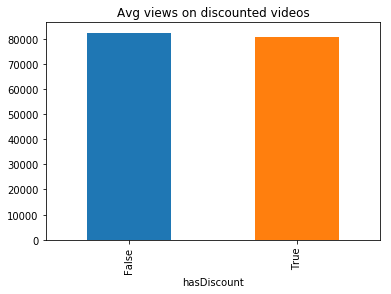

In [177]:
dfData['hasDiscount'] = dfData['Description'].str.contains('discount') | dfData['Description'].str.contains('code')
dfData.groupby('hasDiscount').ViewCount.mean().plot(kind = 'bar', title = 'Avg views on discounted videos')
print(dfData.groupby('hasDiscount').ViewCount.mean())

In [178]:
dfData['LikeDislikeRatio'] = dfData['LikeCount']/(dfData['LikeCount'] + dfData['DislikeCount'])

In [179]:
dfData.shape

(3366, 39)

In [180]:
dfData.columns

Index(['Id', 'Title', 'Description', 'LikeCount', 'DislikeCount', 'ViewCount',
       'FavoriteCount', 'CommentCount', 'PublishedAt', 'Channel Id',
       'Channel Title', 'Tags', 'Thumbnail Default', 'Lang',
       'PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount',
       'PrevPublishedAt', 'PrevViewCount', 'PrevTitle', 'PublishedYear',
       'ChannelAge', 'Title-Clickbait', 'publishedAt', 'subscriberCount',
       'channelVideoCount', 'channelViewCount', 'HowTo', 'Motivation',
       'Transform', 'Abs Video', 'Chest Video', 'Back Video', 'Legs Video',
       'Arm Video', 'Category', 'isSponsored', 'hasDiscount',
       'LikeDislikeRatio'],
      dtype='object')

In [181]:
def feature_engineer(dfData):
    dfData =dfData.drop(['Category','FavoriteCount', 'PrevTitle', 'PrevPublishedAt'],axis =1)
    dfData['is_english'] = dfData['Lang'].apply(lambda x: 1 if x=='en' else 0)
    dfData = dfData.drop('Lang', axis=1)
    
    dfData['is_Abs'] = dfData['Abs Video'].apply(lambda x: 1 if x==True else 0)
    dfData['is_Chest'] = dfData['Chest Video'].apply(lambda x: 1 if x==True else 0)
    dfData['is_Back'] = dfData['Back Video'].apply(lambda x: 1 if x==True else 0)
    dfData['is_Legs'] = dfData['Legs Video'].apply(lambda x: 1 if x==True else 0)
    dfData['is_Arms'] = dfData['Arm Video'].apply(lambda x: 1 if x==True else 0)
    dfData['isSponsored'] = dfData['isSponsored'].apply(lambda x: 1 if x==True else 0)
    dfData['hasDiscount'] = dfData['hasDiscount'].apply(lambda x: 1 if x==True else 0)
    dfData['PublishedYear'] = dfData['PublishedAt'].apply(lambda x: x[:4])
    dfData['ChannelAge'] =  dfData['publishedAt'].apply(lambda x: x[:4])
    dfData['channelViewCount'] = np.log(dfData['channelViewCount'])
    #dfData['nsfw_score'] = dfData['nsfw_score'].fillna(dfData['nsfw_score'].mean())
    #dfData['Title-Clickbait'] = dfData['Title-Clickbait'].fillna(dfData['nsfw_score'].mean())
    dfData['Title-Clickbait'] = dfData['Title-Clickbait'].fillna(0)
    dfData['LikeDislikeRatio'] = dfData['LikeCount']/(dfData['DislikeCount'] + dfData['LikeCount'])
    dfData['PrevCommentCount'] = dfData['PrevCommentCount'].fillna(0)
    dfData['PrevDislikeCount'] = dfData['PrevDislikeCount'].fillna(0)
    dfData['PrevLikeCount'] = dfData['PrevLikeCount'].fillna(0)
    dfData['PrevViewCount'] = dfData['PrevViewCount'].fillna(0)
    #dfData['PrevPublishedYear'] = dfData['PrevPublishedAt'].apply(lambda x: x[:4])
    
    
    dfData['LikeDislikeRatio'] = dfData['LikeDislikeRatio'].replace(np.inf, np.nan)
    dfData['LikeDislikeRatio'] = dfData['LikeDislikeRatio'].fillna(0)
    dfData = dfData.drop(['Title','Description','PublishedAt','publishedAt','Channel Id','Channel Title','Tags','Thumbnail Default','Abs Video','Chest Video','Back Video','Legs Video','Arm Video'],axis = 1)
    
    return dfData

def drop_obvious_features(dfData):
    dfData = dfData.drop(['LikeCount','DislikeCount','CommentCount'],axis = 1)
    return dfData

def drop_engineered_features(dfData):
    dfData = dfData.drop(['Title-Clickbait'],axis = 1)
    return dfData

In [182]:
df = feature_engineer(dfData)
df.columns

Index(['Id', 'LikeCount', 'DislikeCount', 'ViewCount', 'CommentCount',
       'PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount',
       'PrevViewCount', 'PublishedYear', 'ChannelAge', 'Title-Clickbait',
       'subscriberCount', 'channelVideoCount', 'channelViewCount', 'HowTo',
       'Motivation', 'Transform', 'isSponsored', 'hasDiscount',
       'LikeDislikeRatio', 'is_english', 'is_Abs', 'is_Chest', 'is_Back',
       'is_Legs', 'is_Arms'],
      dtype='object')

In [183]:
df.columns

Index(['Id', 'LikeCount', 'DislikeCount', 'ViewCount', 'CommentCount',
       'PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount',
       'PrevViewCount', 'PublishedYear', 'ChannelAge', 'Title-Clickbait',
       'subscriberCount', 'channelVideoCount', 'channelViewCount', 'HowTo',
       'Motivation', 'Transform', 'isSponsored', 'hasDiscount',
       'LikeDislikeRatio', 'is_english', 'is_Abs', 'is_Chest', 'is_Back',
       'is_Legs', 'is_Arms'],
      dtype='object')

In [184]:
X, y = df.drop('ViewCount',axis = 1) , np.log(df['ViewCount'])

### Modeling training data with GradientBoostedClassifier
linear regression does not work great

In [1]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
#from xgboost import XGBClassifier, XGBRegressor

KeyboardInterrupt: 

In [186]:
#train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

X_id, X = X.Id, X.drop('Id', axis = 1)

reg = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=5, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=0.5, verbose=0, warm_start=False)
reg.fit(X, y)
reg.score(X, y)
pred = reg.predict(X)



### Evaluation
1. used mean absolute percentage error, rmse and created two separate dataframe for different nature of videos
2. videos with mape > 0.4 are videos whose views are dependant on unknown feature like influencer, celebrity, social status, maybe advertisement had run etc
3. videos with mape < 0.4 are videos whose viewership is cor-relating with above features.Organic viewership of those videos is within 12800 views of predicted value.


In [191]:
# function exponentiates values in test_y and pred and
# than calulated rmse of actual views
size = y.shape[0]
test_yL = y.tolist()
predL = pred.tolist()
#X_id = X_id.tolist()
exActView = []
exPredView = []
diff = []
mape = {}
sqErr = []
for i in range(0, size):
    exActView.append(math.exp(test_yL[i]))
    exPredView.append(math.exp(predL[i]))
    diff.append(exActView[i] - exPredView[i])
    sqErr.append(math.pow(diff[i], 2))
for i in range(0, len(diff)):
    mape[X_id[i]] = abs(diff[i]/exActView[i])
#Mape = sum(mape)/len(diff)
rmse = math.sqrt(sum(sqErr) /size)/ (max(test_yL) - min(test_yL))
dfEval = pd.DataFrame({'Actual' : exActView, 'Pred': exPredView, 'Diff': diff})
dfEval.head()

,Actual,Diff,Pred
0,13577683.0,6.469744e+06,7.107939e+06
1,9986096.0,4.052078e+06,5.934018e+06
2,8532402.0,3.258138e+06,5.274264e+06
3,8301027.0,4.338251e+06,3.962776e+06
4,7141821.0,2.278046e+06,4.863775e+06


In [344]:
print("Rmse of the regressormodel is:" + str(rmse))

Rmse of the regressormodel is:20283.20712707135


In [345]:
count = 0
viralId = []
for key, val in mape.items():
    if val <= 0.4:
        count+=1
        viralId.append(key)
print(count)

1893


### Analysis of videos with higher mape greater than 0.4

for Id in viralId:
    df.loc[df['Id'] == Id,].to_csv('/home/archit/Desktop/ad vs organic/correct_data.csv', header=False, mode = 'a', index = False)

dfOutlier = pd.read_csv('/home/archit/Desktop/ad vs organic/correct_data.csv')
dfOutlier.columns = ['Id', 'LikeCount', 'DislikeCount', 'ViewCount', 'CommentCount',
       'PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount',
       'PrevViewCount', 'PublishedYear', 'ChannelAge', 'Title-Clickbait',
       'subscriberCount', 'channelVideoCount', 'channelViewCount', 'HowTo',
       'Motivation', 'Transform', 'isSponsored', 'hasDiscount',
       'LikeDislikeRatio', 'is_english', 'is_Abs', 'is_Chest', 'is_Back',
       'is_Legs', 'is_Arms']
dfOutlier.to_csv('/home/archit/Desktop/ad vs organic/correct_data.csv', index = False)
dfOutlier.head()

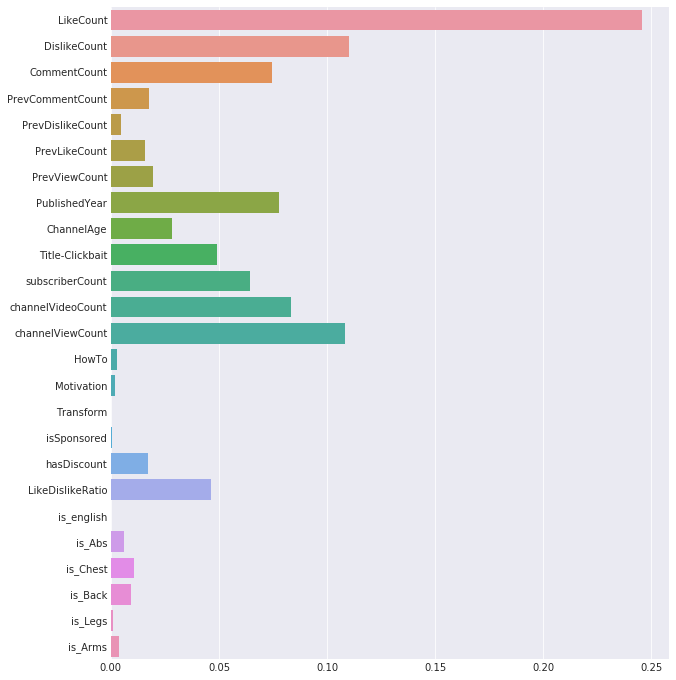

In [347]:
#X = X.drop('Id', axis = 1)
sns.set_style('darkgrid')
plt.figure(figsize=(10,12))
sns.barplot(x=reg.feature_importances_, y=X.columns)

In [228]:
df = drop_engineered_features(feature_engineer(dfData))
print(df.columns)
X, y = df.drop(['ViewCount', 'LikeDislikeRatio'], axis = 1), np.log(df['ViewCount'])
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

train_X_id, train_X = train_X.Id, train_X.drop('Id', axis = 1)
test_X_id, test_X = test_X.Id, test_X.drop('Id', axis = 1)

reg = GradientBoostingRegressor()
reg.fit(train_X, train_y)
reg.score(test_X, test_y)
#pred = reg.predict(test_X)

Index(['Id', 'LikeCount', 'DislikeCount', 'ViewCount', 'CommentCount',
       'ContainsText', 'PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount',
       'PrevViewCount', 'PublishedYear', 'ChannelAge', 'subscriberCount',
       'channelVideoCount', 'channelViewCount', 'HowTo', 'Motivation',
       'Transform', 'isSponsored', 'hasDiscount', 'LikeDislikeRatio',
       'is_english', 'is_Abs', 'is_Chest', 'is_Back', 'is_Legs', 'is_Arms'],
      dtype='object')


0.8584454937369685

In [229]:
# function exponentiates values in test_y and pred and
# than calulated rmse of actual views
size = test_y.shape[0]
test_yL = test_y.tolist()
predL = pred.tolist()
exActView = []
exPredView = []
diff = []
sqErr = []
for i in range(0, size):
    exActView.append(math.exp(test_yL[i]))
    exPredView.append(math.exp(predL[i]))
    diff.append(exActView[i] - exPredView[i])
    sqErr.append(math.pow(diff[i], 2))
rmse = math.sqrt(sum(sqErr) /size)/ (test_y.max() - test_y.min())
dfEval = pd.DataFrame({'Actual' : exActView, 'Pred': exPredView, 'Diff': diff})
dfEval.head()

,Actual,Diff,Pred
0,22523.0,-100800.651220,123323.651220
1,22800.0,-33380.795454,56180.795454
2,38784.0,20898.821422,17885.178578
3,14260.0,10178.879260,4081.120740
4,36103.0,6436.962068,29666.037932


In [230]:
print("Rmse of the regressormodel is:" + str(rmse))

Rmse of the regressormodel is:69654.11596662669


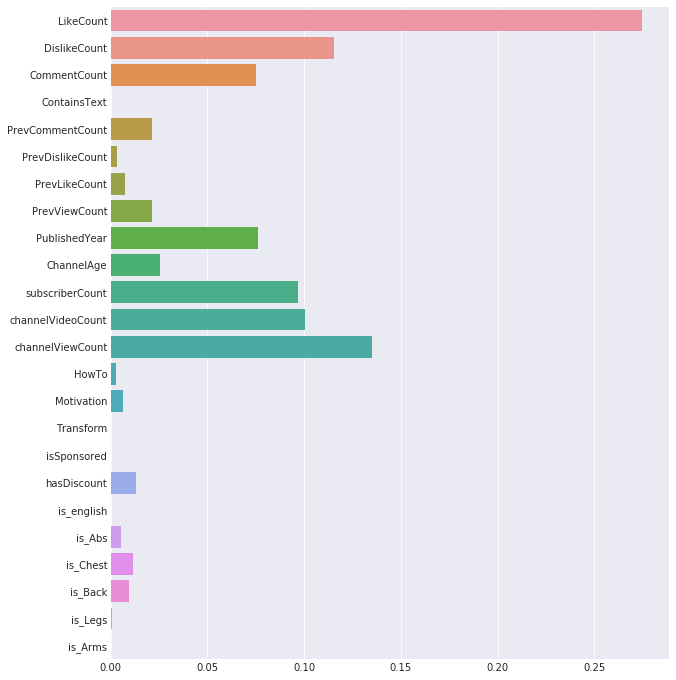

In [231]:
X = X.drop('Id', axis = 1)
sns.set_style('darkgrid')
plt.figure(figsize = (10, 12))
sns.barplot(x=reg.feature_importances_, y = X.columns)

### give conclusions and understand the project